# Manuscript Sims 4

## msprime
msprime v1.0.2

In [550]:
#imports
import msprime
from IPython.display import display, SVG
import numpy as np
import toytree

#### Utility Functions

In [42]:
# sim_ancestry function
def ancestry(pop_size, split_time, seq_len, sample_size, recomb_rate = None):
    demography = msprime.Demography()
    
    # init the two branch populations
    demography.add_population(name="A", initial_size=pop_size)
    demography.add_population(name="B", initial_size=pop_size)
    
    # init the merged population
    demography.add_population(name="C", initial_size=pop_size)
    
    # specify the population split (time = tau)
    demography.add_population_split(time=split_time, derived=["A", "B"], ancestral="C")
    
    # simulate the trees on a 1e6 bp chromosome
    return msprime.sim_ancestry(samples={"A": sample_size, "B": sample_size},
                              demography=demography,
                              ploidy=2,
                              recombination_rate=recomb_rate, 
                              sequence_length=seq_len)

In [31]:
# toytree plot function
def ttplot(ts):
    tt = toytree.tree(next(ts.trees()).newick())
    tt.draw(ts='p',width=500,height=500);

In [48]:
# mutate function
def ms_mutate(ts, mut_rate, model = None):
    return msprime.sim_mutations(ts, 
                          rate = mut_rate, 
                          model = model)

#SVG plot
def plot_svg(ts):
    return SVG(ts.draw_svg(size = (1000, 600), y_axis = True))

In [ ]:
# calculate Fst

### Small Ne

In [249]:
ts = ancestry(pop_size = 100, 
              split_time = 5_000, 
              seq_len = 1e6, 
              sample_size = 5)

In [250]:
ttplot(ts)

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="500.0px" height="500.0px" viewBox="0 0 500.0 500.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="t48bad269b0b447d7a836d31cc8fd81c5"> 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 10 5 1 6 4 7 3 8 2 9 15 11 12 18 16 13 20 19 17 14 0 1393 2785 4178 5570

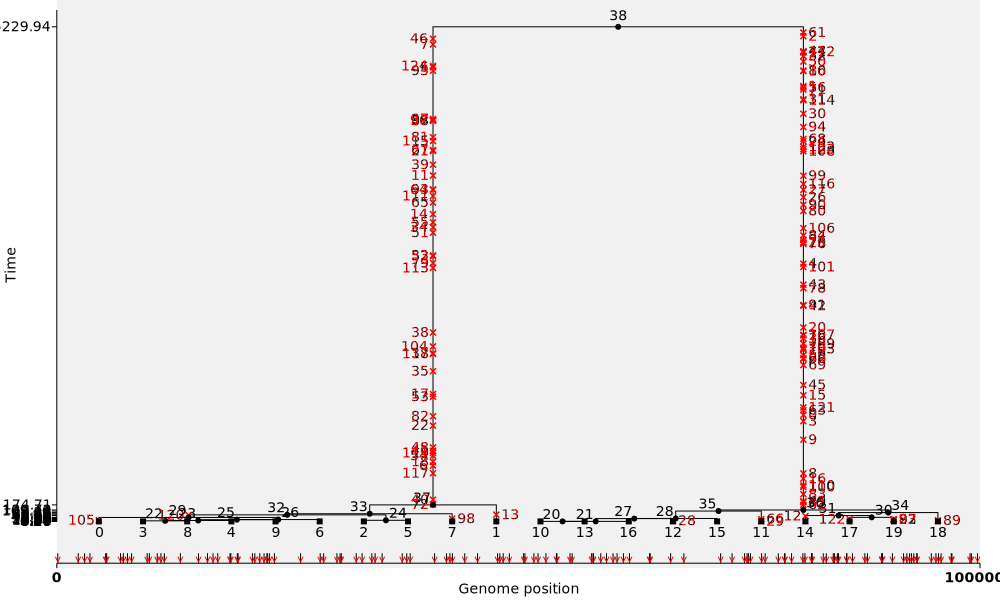

In [506]:
mts = ms_mutate(ts = ts,
                mut_rate = 1e-8)
plot_svg(mts)

#### Calculate Fst over many runs
- Ne = 100
- Split time = 5000
- Mutation rate = 1e-8

In [514]:
%%time
#Fst over 50 runs:
fsts = []
for i in range (1,50):
    ts = ancestry(pop_size = 100, 
              split_time = 5_000, 
              seq_len = 1e6, 
              sample_size = 5)
    mts = ms_mutate(ts = ts,
                mut_rate = 1e-8)
    sets = [[1,2,6,7],[11,12,16,17]]
    fsts.append(mts.Fst(sets))
np.mean(fsts)

CPU times: user 251 ms, sys: 68 ms, total: 319 ms
Wall time: 318 ms


0.9164663546089156

In [515]:
%%time
#Fst over 50 runs with SLiM model:
fsts = []
for i in range (1,50):
    ts = ancestry(pop_size = 100, 
              split_time = 5_000, 
              seq_len = 1e6, 
              sample_size = 5)
    model = msprime.SLiMMutationModel(type=1)
    mts = ms_mutate(ts = ts,
                mut_rate = 1e-8,
                model = model)
    sets = [[1,2,6,7],[11,12,16,17]]
    fsts.append(mts.Fst(sets))
np.mean(fsts)

CPU times: user 234 ms, sys: 52.2 ms, total: 286 ms
Wall time: 285 ms


0.9162927692880285

### Large Ne

In [509]:
ts = ancestry(pop_size = 20_000, 
              split_time = 5_000, 
              seq_len = 1e6, 
              sample_size = 5)
ttplot(ts)

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="500.0px" height="500.0px" viewBox="0 0 500.0 500.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="t25525125ae9746938b1ed79cb50ea56c"> 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 19 12 11 18 13 17 15 14 8 2 6 10 4 9 5 1 16 7 3 20 0 20422 40843 61265 81687

In [510]:
ts = ancestry(pop_size = 100_000, 
              split_time = 30_000, 
              seq_len = 1e6, 
              sample_size = 5)
ttplot(ts)

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="500.0px" height="500.0px" viewBox="0 0 500.0 500.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="t2e845618f44342f793ae4d4f8d4fac14"> 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 4 2 18 9 8 3 19 15 7 5 10 6 16 14 11 17 13 20 12 1 0 51427 102854 154281 205708

#### Calculate Fst over many runs
- Ne = 100
- Split time = 5000
- Mutation rate = 1e-8

In [516]:
%%time
#Fst over 50 runs:
fsts = []
for i in range (1,50):
    ts = ancestry(pop_size = 20_000, 
              split_time = 5_000, 
              seq_len = 1e6, 
              sample_size = 5)
    mts = ms_mutate(ts = ts,
                mut_rate = 1e-8)
    sets = [[1,2,6,7],[11,12,16,17]]
    fsts.append(mts.Fst(sets))
np.mean(fsts)

CPU times: user 449 ms, sys: 50.9 ms, total: 500 ms
Wall time: 498 ms


0.0364141367431619

In [517]:
%%time
#Fst over 50 runs with SLiM model:
fsts = []
for i in range (1,50):
    ts = ancestry(pop_size = 20_000, 
              split_time = 5_000, 
              seq_len = 1e6, 
              sample_size = 5)
    model = msprime.SLiMMutationModel(type=1)
    mts = ms_mutate(ts = ts,
                mut_rate = 1e-8,
                model = model)
    sets = [[1,2,6,7],[11,12,16,17]]
    fsts.append(mts.Fst(sets))
np.mean(fsts)

CPU times: user 453 ms, sys: 73.4 ms, total: 526 ms
Wall time: 525 ms


0.034214764728186436

### With Recombination
#### Small Ne

In [518]:
%%time
#Fst over 50 runs:
fsts = []
for i in range (1,50):
    ts = ancestry(pop_size = 100, 
              split_time = 5_000, 
              seq_len = 1e6, 
              sample_size = 5,
              recomb_rate = 1e-9)
    mts = ms_mutate(ts = ts,
                mut_rate = 1e-8)
    sets = [[1,2,6,7],[11,12,16,17]]
    fsts.append(mts.Fst(sets))
print(f"Average Fst over 50 runs = {np.mean(fsts)} "
     f"for population size 100 and split time 5000\n")

Average Fst over 50 runs = 0.9237977815583921 for population size 100 and split time 5000

CPU times: user 254 ms, sys: 53.7 ms, total: 307 ms
Wall time: 308 ms


In [519]:
%%time
#Fst over 50 runs with SLiM model:
fsts = []
for i in range (1,50):
    ts = ancestry(pop_size = 100, 
              split_time = 5_000, 
              seq_len = 1e6, 
              sample_size = 5,
              recomb_rate = 1e-9)
    model = msprime.SLiMMutationModel(type=1)
    mts = ms_mutate(ts = ts,
                mut_rate = 1e-8,
                model = model)
    sets = [[1,2,6,7],[11,12,16,17]]
    fsts.append(mts.Fst(sets))
print(f"Average Fst over 50 runs = {np.mean(fsts)} "
     f"for population size 100 and split time 5000\n")

Average Fst over 50 runs = 0.9239421926438104 for population size 100 and split time 5000

CPU times: user 260 ms, sys: 69 ms, total: 329 ms
Wall time: 329 ms


#### Large Ne

In [520]:
%%time
#Fst over 50 runs:
fsts = []
for i in range (1,50):
    ts = ancestry(pop_size = 20_000, 
              split_time = 5_000, 
              seq_len = 1e6, 
              sample_size = 5,
              recomb_rate = 1e-9)
    mts = ms_mutate(ts = ts,
                mut_rate = 1e-8)
    sets = [[1,2,6,7],[11,12,16,17]]
    fsts.append(mts.Fst(sets))
np.mean(fsts)

CPU times: user 513 ms, sys: 69.9 ms, total: 583 ms
Wall time: 585 ms


0.05063828194012335

In [521]:
%%time
#Fst over 50 runs with SLiM model:
fsts = []
for i in range (1,50):
    ts = ancestry(pop_size = 20_000, 
              split_time = 5_000, 
              seq_len = 1e6, 
              sample_size = 5,
              recomb_rate = 1e-9)
    model = msprime.SLiMMutationModel(type=1)
    mts = ms_mutate(ts = ts,
                mut_rate = 1e-8,
                model = model)
    sets = [[1,2,6,7],[11,12,16,17]]
    fsts.append(mts.Fst(sets))
np.mean(fsts)

CPU times: user 548 ms, sys: 87.2 ms, total: 635 ms
Wall time: 638 ms


0.06303432487549807

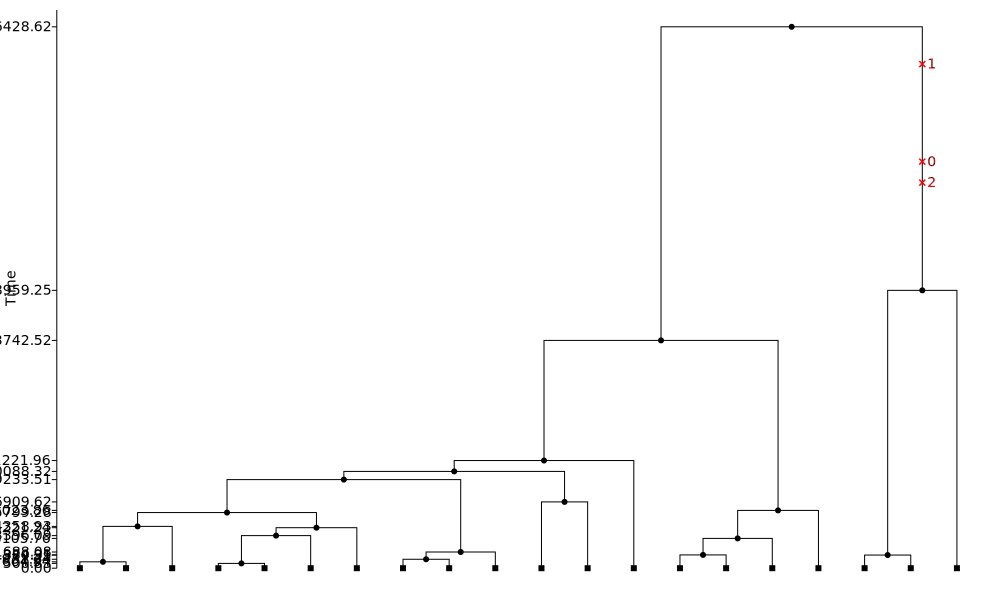

In [522]:
#SLiM-type mutation model
model = msprime.SLiMMutationModel(type=1)
mts_slim_largeNe = msprime.sim_mutations(
    ts, rate=1e-8, random_seed=1234, model=model)

t = mts_slim_largeNe.first()
ml = {m.id: m.derived_state for m in mts_slim_largeNe.mutations()}
SVG(t.draw_svg(mutation_labels=ml, node_labels={}, size=(1000, 600), y_axis = True))

## SLiM
SLiM version: *upstream, development head (from GitHub)*

In [67]:
import os
import subprocess
import tskit
import msprime
import pyslim

In [523]:
def slim_func(name, 
              seed, 
              popsize:int, 
              mutrate:float, 
              recomb_rate:float, 
              seq_len:int, 
              time_after_split:int):
    """
    Runs a simple simulation with a single-split 
    demography and neutral mutations from a starting 
    seed, saves a treesequence, loads the finished 
    ts with pyslim, and returns the SlimTreeSequence 
    object.
    """
    seq_len = int(seq_len - 1)
    SLIM_SCRIPT = """
        initialize() {{
           setSeed({seed});
           initializeSLiMModelType("nonWF");
           initializeTreeSeq(checkCoalescence=T);
           initializeMutationRate({mutrate});
           initializeMutationType("m1", 0.5, "f", 0.0);
           initializeGenomicElementType("g1", m1, 1.0);
           initializeGenomicElement(g1, 0, {seq_len});
           initializeRecombinationRate({recomb_rate});    
           defineConstant("K", {popsize});
           defineGlobal("counter", 0);
        }}

        reproduction() {{
           subpop.addCrossed(individual,subpop.sampleIndividuals(1));
        }}

        1 early() {{
           sim.addSubpop("p1", K);
        }}

        early() {{
           p1.fitnessScaling = K / p1.individualCount;
        }}
        
        s6 1: early() {{
            if (sim.treeSeqCoalesced())
            {{
                counter = counter + 1;

                if (counter == 1)
                {{
                    sim.rescheduleScriptBlock(s5, start = sim.generation + 1, end = sim.generation + 1);
                }}
            }}
        }}

        s5 100000 late() {{
            split_time = sim.generation + 500;
            end_time = split_time + {time_after_split};
            sim.rescheduleScriptBlock(s1, start = split_time, end = split_time);
            sim.rescheduleScriptBlock(s2, start = split_time, end = split_time);
            sim.rescheduleScriptBlock(s3, start = split_time);
            sim.rescheduleScriptBlock(s4, start = end_time, end = end_time);

        }}



        s1 100000 early() {{
            sim.addSubpop("p2", K);
            sim.addSubpop("p3", K);
            //randomly choose half p1 individuals to move into p2
            migrants = p1.sampleIndividuals(asInteger(K/2));
            p2.takeMigrants(migrants);
            //place the remaining individuals in p1 into p3
            p3.takeMigrants(p1.individuals);
        }}

        s2 100000 late() {{
            //remove ancestral population from the simulation
            p1.fitnessScaling = 0.0;
        }}

        s3 100000: early() {{
            p2.fitnessScaling = K / p2.individualCount;
            p3.fitnessScaling = K / p3.individualCount;
        }}

        s4 100001 late() {{
            sim.treeSeqOutput("/tmp/test.trees");
            sim.simulationFinished();
        }}
    """
    
    # write slim script to temp file
    script_path = os.path.join("/tmp", name + ".slim")
    with open(script_path, 'w') as out:
        out.write(SLIM_SCRIPT.format(seed=seed, 
                                     name=name,
                                     popsize=popsize,
                                     mutrate = mutrate,
                                     recomb_rate = recomb_rate,
                                     seq_len = seq_len,
                                     time_after_split = time_after_split,
                                     ))
    
#     print(SLIM_SCRIPT.format(seed=seed, 
#                               name=name,
#                               popsize=popsize,
#                               mutrate = mutrate,
#                               recomb_rate = recomb_rate,
#                               seq_len = seq_len,
#                               time_after_split = time_after_split,
#                                      ))
        
    # run slim
    subprocess.run(
        ['/Users/elissa/bin/slim', script_path], 
        stdout=subprocess.DEVNULL, 
        stderr=subprocess.STDOUT, 
        check=True,
    )
    
    # load the tree sequence
    ts = pyslim.load(f'/tmp/{name}.trees')
    return ts

In [524]:
#simplify function
def make_sts(ts, sample_size):
    set1 = []
    set2 = []
    for i in ts.individuals_alive_at(0):
        if ts.individual(i).metadata["subpopulation"] == 2:
            set1.append(i)
        elif ts.individual(i).metadata["subpopulation"] == 3:
            set2.append(i)
    sample1 = []
    sample2 = []
    keep_inds = []
    sample1 = np.random.choice(set1, sample_size, replace = False).tolist()
    sample2 = np.random.choice(set2, sample_size, replace = False).tolist()
    keep_inds = sample1 + sample2
    keep_nodes = []
    for i in keep_inds:
       keep_nodes.extend(ts.individual(i).nodes)
    return ts.simplify(samples = keep_nodes, keep_input_roots=True)

### Small Ne

In [533]:
#without recombination
smallne = slim_func(name = 'test', 
          seed = np.random.randint(0,10000),
          popsize = 100,
          mutrate = 1e-8, 
          recomb_rate = 0.0, 
          seq_len = 1e6,
          time_after_split = 5000,
          )
smallne

In [535]:
ttplot(smallne)

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="500.0px" height="500.0px" viewBox="0 0 500.0 500.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="t3272a76548d94d08b5103c44aa0bd000"> 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323 324 325 326 327 328 329 330 331 332 333 334 335 336 337 338 339 340 341 342 343 344 345 346 347 348 349 350 351 352 353 354 355 356 357 358 359 360 361 362 363 364 365 366 367 368 369 370 371 372 373 374 375 376 377 378 379 380 381 382 383 384 385 386 387 388 389 390 391 392 393 394 395 396 397 398 399 400 401 402 403 404 405 406 407 408 409 410 411 412 413 414 415 416 417 418 419 420 421 422 423 424 425 426 427 428 429 430 431 432 433 434 435 436 437 438 439 440 441 442 443 444 445 446 447 448 449 450 451 452 453 454 455 456 457 458 459 460 461 462 463 464 465 466 467 468 469 470 471 472 473 474 475 476 477 478 479 480 481 482 483 484 485 486 487 488 489 490 491 492 493 494 495 496 497 498 499 500 501 502 503 504 505 506 507 508 509 510 511 512 513 514 515 516 517 518 519 520 521 522 523 524 525 526 527 528 529 530 531 532 533 534 535 536 537 538 539 540 541 542 543 544 545 546 547 548 549 550 551 552 553 554 555 556 557 558 559 560 561 562 563 564 565 566 567 568 569 570 571 572 573 574 575 576 577 578 579 580 581 582 583 584 585 586 587 588 589 590 591 592 593 594 595 596 597 598 599 600 601 602 603 604 605 606 607 608 609 610 611 612 613 614 615 616 617 618 619 620 621 622 623 624 625 626 627 628 629 121 82 173 65 22 184 100 179 69 202 205 108 106 180 86 74 125 109 137 206 12 147 140 96 189 89 208 207 155 153 76 168 32 49 60 209 119 33 154 149 166 107 161 201 118 170 213 131 66 135 115 178 83 204 98 171 62 203 156 186 138 111 214 105 46 215 182 64 181 163 141 130 124 67 52 142 114 34 210 199 101 150 104 185 162 190 99 90 158 128 132 193 211 183 165 126 216 172 195 87 56 191 15 198 192 133 57 14 194 10 134 169 196 152 122 113 84 35 159 120 102 73 187 160 103 218 37 188 175 110 139 157 177 144 146 143 151 148 112 61 75 176 136 117 77 72 127 167 174 200 93 8 123 129 116 217 164 212 197 145 369 313 400 335 391 366 322 279 276 237 314 319 311 294 407 324 278 408 387 406 317 249 307 354 378 230 410 404 359 321 257 227 380 356 309 389 393 385 341 412 353 349 344 275 352 342 343 243 390 327 303 300 397 374 320 236 345 339 333 312 360 232 398 395 372 336 416 364 386 287 373 365 362 340 392 286 355 346 334 329 283 238 332 375 284 388 291 305 231 246 394 331 396 302 381 367 409 326 220 323 405 368 351 316 414 338 403 260 358 399 274 3

In [536]:
sts = make_sts(smallne, 5)
sts
#plot_svg(sts)

In [539]:
ttplot(sts)

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="500.0px" height="500.0px" viewBox="0 0 500.0 500.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="tfc43640e2b714e42aa24f9ee6aad156a"> 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 9 6 10 7 5 4 8 2 3 1 17 14 15 16 20 19 12 18 13 0 1498 2996 4495 5993

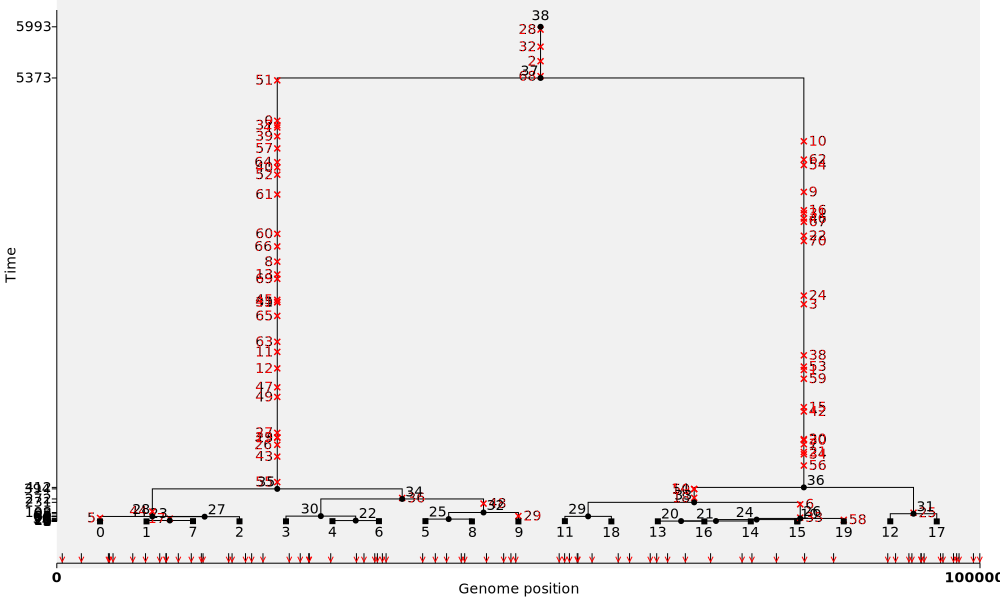

In [537]:
plot_svg(sts)

In [540]:
sts.Fst([[0,6,9,7],[10,12,16,11]])

array(0.8938992)

In [487]:
for i in sts.individuals():
    print(sts.individual(i.id).metadata["subpopulation"])

2
2
2
2
2
3
3
3
3
3


In [541]:
#with recombination
smallne = slim_func(name = 'test', 
          seed = 1234,
          popsize = 100,
          mutrate = 1e-9, 
          recomb_rate = 1e-9, 
          seq_len = 1e6,
          time_after_split = 5000,
          )
smallne

In [546]:
%%time
#Fst over 50 SLiM runs without recombination:
fsts = []
for i in range (1,50):
    smallne = slim_func(
          name = 'test', 
          seed = 1234,
          popsize = 100,
          mutrate = 1e-8, 
          recomb_rate = 0.0, 
          seq_len = 1e6,
          time_after_split = 5000,
          )    
    
    #simplify to 5 samples from each branch
    sts = make_sts(smallne, 5)
    
    #order is always in order
    sets = [[0,6,9,7],[10,12,16,11]]

    fsts.append(sts.Fst(sets))
np.mean(fsts)

CPU times: user 377 ms, sys: 519 ms, total: 897 ms
Wall time: 37.3 s


0.8712338131778065

In [547]:
%%time
#Fst over 50 SLiM runs with recombination:
fsts = []
for i in range (1,50):
    smallne = slim_func(name = 'test', 
          seed = 1234,
          popsize = 100,
          mutrate = 1e-9, 
          recomb_rate = 1e-9, 
          seq_len = 1e6,
          time_after_split = 5000,
          )
    #simplify to 5 samples from each branch
    sts = make_sts(smallne, 5)
    
    #order is always in order
    sets = [[0,6,9,7],[10,12,16,11]]

    fsts.append(sts.Fst(sets))
np.mean(fsts)

CPU times: user 398 ms, sys: 523 ms, total: 920 ms
Wall time: 40.1 s


1.0

### Large Ne

In [ ]:
%%time
#without recombination
bigne = slim_func(name = 'test', 
          seed = 1234,
          popsize = 20000,
          mutrate = 1e-9, 
          recomb_rate = 0.0, 
          seq_len = 1e6,
          time_after_split = 5000,
          )
bigne

In [552]:
%%time
#Fst over 3 SLiM runs without recombination:
fsts = []
for i in range (1,3):
    smallne = slim_func(
          name = 'test', 
          seed = 1234,
          popsize = 20_000,
          mutrate = 1e-8, 
          recomb_rate = 0.0, 
          seq_len = 1e6,
          time_after_split = 5000,
          )    
    
    #simplify to 5 samples from each branch
    sts = make_sts(smallne, 5)
    
    #order is always in order
    sets = [[0,6,9,7],[10,12,16,11]]

    fsts.append(sts.Fst(sets))
np.mean(fsts)

KeyboardInterrupt: 

In [553]:
%%time
#Fst over 3 SLiM runs with recombination:
fsts = []
for i in range (1,3):
    smallne = slim_func(
          name = 'test', 
          seed = 1234,
          popsize = 20_000,
          mutrate = 1e-8, 
          recomb_rate = 1e-9, 
          seq_len = 1e6,
          time_after_split = 5000,
          )    
    
    #simplify to 5 samples from each branch
    sts = make_sts(smallne, 5)
    
    #order is always in order
    sets = [[0,6,9,7],[10,12,16,11]]

    fsts.append(sts.Fst(sets))
np.mean(fsts)

KeyboardInterrupt: 

## shadie

In [549]:
import shadie

2021-08-26 20:59:24.310 | WARNING  | shadie.base.mutations:__init__:73 - shadie workflow strongly advises against the use of neutral mutations in SLiM simulation unless Chromosome parameter NSsites = False (default = True)


In [ ]:
# define elements types
e1 = shadie.etype([m0], [1], "intron")
e2 = shadie.etype([m2], [1], "neutral")

neut_chrom = shadie.chromosome.explicit(genome_size = 1e6,
                                           #NS_sites = False, 
                                           data = {(0, 999999):e2,
                                                   (1000000, 1000002):e1})

In [ ]:
with shadie.Model() as model:
    # init the model
    model.initialize(chromosome=neut_chrom, length = 5000, fileout = "neutral_sim1")

    model.reproduction.base(
        chromosome = rand_chrom,
        ne=100,
        )
    
print(model.script)
#model.run()